In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')


In [3]:
print("Customers:")
print(customers.head())
print("\nTransactions:")
print(transactions.head())
print("\nProducts:")
print(products.head())

Customers:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Transactions:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  

Products:
  ProductID              Product

In [4]:
data = transactions.merge(customers, on='CustomerID', how='inner')


In [5]:
data['TotalAmount'] = data['Quantity'] * data['Price']
customer_summary = data.groupby('CustomerID').agg({
    'TotalAmount': 'sum',
    'TransactionID': 'nunique'
}).rename(columns={'TransactionID': 'Frequency'}).reset_index()


In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_summary[['TotalAmount', 'Frequency']])

In [7]:
db_scores = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    db_score = davies_bouldin_score(scaled_data, labels)
    db_scores.append(db_score)

In [8]:
optimal_k = k_values[np.argmin(db_scores)]
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 2


In [9]:
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_labels = final_kmeans.fit_predict(scaled_data)


In [10]:
customer_summary['Cluster'] = final_labels


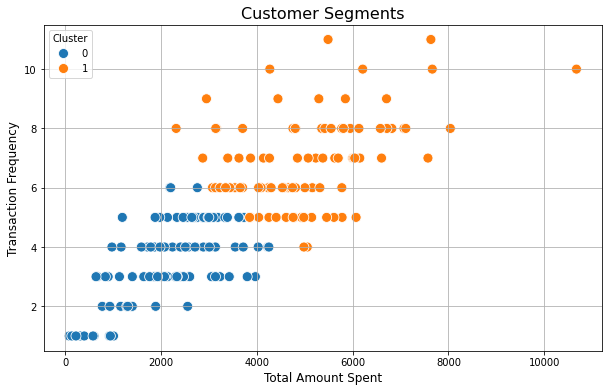

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_summary, x='TotalAmount', y='Frequency', hue='Cluster', palette='tab10', s=100)
plt.title('Customer Segments', fontsize=16)
plt.xlabel('Total Amount Spent', fontsize=12)
plt.ylabel('Transaction Frequency', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [12]:
print(f"Davies-Bouldin Index for optimal clusters ({optimal_k}): {min(db_scores)}")


Davies-Bouldin Index for optimal clusters (2): 0.73411606787063
